<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 12월 23일

# KNN 분류 분석 실습 (분류 알고리즘에서 가장 정확도가 높다)

In [0]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.92

In [0]:
#NaN 값이 많은 deck열(변수) 삭제
#embarked와 embark_town 열(변수)는 의미가 동일하므로 town삭제
ndf=df.drop(['deck','embark_town'], axis=1)
print(ndf.info())

#age 변수의 값이 NaN인 행을 삭제
ndf=ndf.dropna(subset=['age'], how='any', axis=0)
print(len(ndf))

#embarked 열의 NaN값을 승선도시 중에서 가장 많이 출연한 데이터 값으로 치환
ndf['embarked'].value_counts(dropna=True).idxmax() 
most_freq=ndf['embarked'].value_counts(dropna=True).idxmax() 
print(most_freq)
ndf['embarked'].fillna(most_freq, inplace=True) #S값으로 치환
print(ndf.describe(include='all'))

#분류 분석에 사용할 변수 선택
X=ndf[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
Y=ndf['survived']

#범주형 데이터를 모델이 인식할 수 있는 숫자형 데이터로 변환  : one-hot encoding
#sex/embarked 범주형데이터를 숫자로 변환
onehot_sex=pd.get_dummies(ndf['sex'])
ndf=pd.concat([ndf, onehot_sex],axis=1)

onehot_embarked=pd.get_dummies(ndf['embarked']) 
#pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않는다.
#대신 어떤 열이 연속형인지 범주형인지를 지정할 수 있는 scikit-learn의 OneHotEncoder를 사용할 수 있고 
#DataFrame에 있는 숫자로 된 열을 문자열로 바꿀수도 있다.

ndf=pd.concat([ndf, onehot_embarked],axis=1) #CONCAT 함수= 두 문자열을 하나의 문자열로 연결하여 반환
print(ndf.info()) #female,male/C,Q,S 열추가됨
X = ndf[ ['pclass', 'female', 'male', 'age', 'sibsp', 'parch', 'C','Q','S']]
Y = ndf['survived']
print(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           714 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      889 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alive         891 non-null object
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.4+ KB
None
714
S
          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         

In [0]:
#KNN 분류 분석을 수행하려면 설명변수를 정규화 (평균 0, 표준편차1)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) #StandardScaler	기본 스케일. 평균과 표준편차 사용(평균0,표준편차1)

# train data:test data 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)   
print(X_train.shape)
print(X_test.shape)

#KNN 분류 분석으로 모델 생성
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, Y_train)

#학습 데이터로부터 생성된 모델로부터 예측값 생성
y_predict = knn.predict(X_test)

print(y_predict[0:10])
print(Y_test.values[0:10])

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(Y_test, y_predict) 
print(knn_matrix) #정확도(precision)가 높다는 것은 False Positive(실제 False를 True로 잘못 예측) 오류가 작다는 뜻
#재현율(recall)이 높다는 것은 False Negative(실제 True를 False로 잘못 예측) 오류가 낮다는 뜻

knn_report = metrics.classification_report(Y_test, y_predict)
print(knn_report)

(499, 9)
(215, 9)
[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[110  15]
 [ 25  65]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       125
           1       0.81      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.81       215
weighted avg       0.81      0.81      0.81       215



In [0]:
# 생존 여부를 분류할 때 영향을 주는 변수를 선택해서 
#k (최근접을 몇 개까지 볼 것인지 지정)는 될도록 작은 수를 설정하고 홀수로 설정해서 분류분석을 수행합니다.
# 데이터셋에서 생존자 클래스(생존자, 비생존자)의 데이터 수가  동일하다면 정확률로, 
#생존자 클래스의 데이터 수가 상이하다면 f1통계량으로 모델의 정확도를 판단한다.
#통상적으로 k=1일때(작을수록) overfitting 발생할 가능성이 높습니다.

knn = KNeighborsClassifier(n_neighbors=7)   #K개수(KNN의 하이퍼파라미터)
knn.fit(X_train, Y_train)

#학습 데이터로부터 생성된 모델로부터 예측값 생성
y_predict = knn.predict(X_test)

print(y_predict[0:10])
print(Y_test.values[0:10])

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(knn_matrix)

knn_report = metrics.classification_report(Y_test, y_predict)
print(knn_report)

[0 0 1 0 0 1 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[113  12]
 [ 30  60]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       125
           1       0.83      0.67      0.74        90

    accuracy                           0.80       215
   macro avg       0.81      0.79      0.79       215
weighted avg       0.81      0.80      0.80       215



# SVM 분류분석 실습

In [0]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf') #SVM의 하이퍼파라미터= cost,gamma(r),kernel
svm_model.fit(X_train,Y_train) #학습, 모델 생성

y_predict = svm_model.predict(X_test)
print(y_predict[0:10])
print(Y_test.values[0:10])

from sklearn import metrics
svm_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(svm_matrix)

svm_report = metrics.classification_report(Y_test, y_predict)
print(svm_report)

#SVM 은 데이터의 특성 개수가 작아도 복잡한 결정 경계를 만들어 주는 분류 방식입니다.
#데이터 전처리(dummy변수, 정규화) 가 필요하며, 매개변수(하이퍼파라미터) 설정에 따라 분류 분석의 성능에 영향이 큼

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 결정트리 교재 p.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p)*(1-p)*np.log2((1-p))
def error(p):
    return 1-np.max([p,1-p])
x=np.arrange(0.0,1.0,0.01)
ent=[entropy(p) if p!=0 else None for p in x]
sc_ent=[e*0.5 if e else None for e in ent]
err=[error(i) for i in x]
fig=plt.figure()
ax=plt.subplot(111)
for i, lab, ls, c, in zip([ent,sc_ent,gini(x),err], #DecisionTree 하이퍼파라미터= 각 노드의 순도는 증가시키고, 불순도(불확실성)는 감소
                         ['Entrop','Entropy(scaled)','Gini Impurity','Misclassification Error'],
                         ['-','-','--','-.'],
                         ['black','lightgray','red','green','cyan']):
    line=ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
         ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train,y_train)
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

AttributeError: module 'numpy' has no attribute 'arrange'

# Decision Tree 분류 분석 실습 

In [0]:
import pandas as pd
import numpy as np

uci_path='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
#print(df.head())
df.columns=['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromation', 'normal_nucleoli', 'mitoses', 'class']
print(df.info())
print(df.describe())
# print(df['bare_nuclei'].unique())  

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
print(df.info())
print(df.describe())

# 설명변수 (독립변수)
X =df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromation', 'normal_nucleoli', 'mitoses']]
# 종속변수 (예측변수, 반응변수)
Y =df['class']

# 설명변수 데이터 정규화
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)

# train:test(7:3)으로 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)

tree_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
#ree_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree_model.fit(X_train,Y_train)
y_predict=tree_model.predict(X_test) 
print(y_predict[0:10])
print(Y_test.values[0:10])

from sklearn import metrics
tree_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(tree_matrix)

tree_report = metrics.classification_report(Y_test, y_predict)
print(tree_report)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699 non-null int64
adhesion           699 non-null int64
epithlial          699 non-null int64
bare_nuclei        699 non-null object
chromation         699 non-null int64
normal_nucleoli    699 non-null int64
mitoses            699 non-null int64
class              699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
                 id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000

# k-means 군집 분석 실습
## 유사한 데이터들의 클러스터 중심점까지의 거리를 이용

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       G

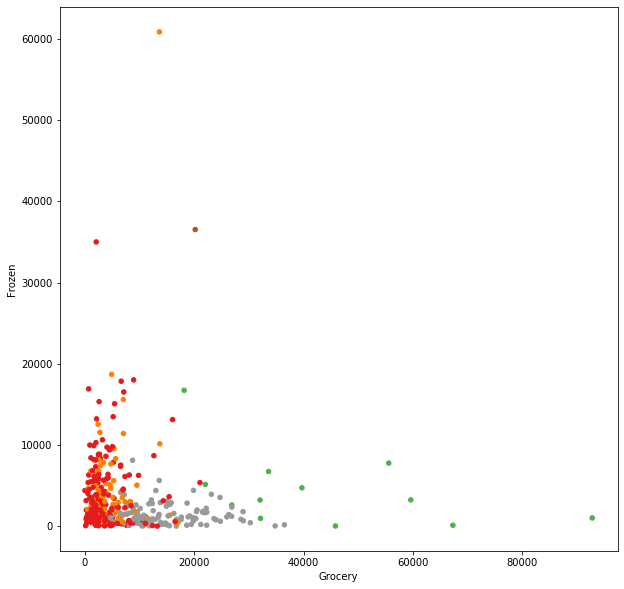

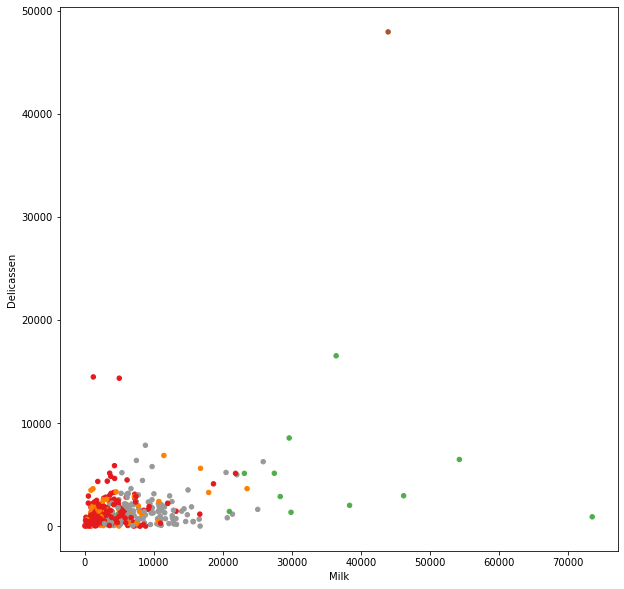

In [0]:
#UCI 머신러닝 저장소에서 제공하는 도매업 고객(wholesale customers) 데이터셋 사용
#각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터 8개의 열에 440개의 관측값이 행으로 구현
#1~2열은 고객의 일반 정보
#‘Channel’ 열은 호텔/레스토랑 또는 소매점 등 판매채널
#‘Region’ 열은 고객 소재지
import pandas as pd
#uci_path='http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale customers data.csv'
uci_path='C:/Users/student/desktop/data/Wholesale customers data.csv'
df = pd.read_csv(uci_path, header=0)
print(df.head())
print(df.info())
print(df.describe())

X=df.iloc[ : , : ] #비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다.

from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X) #StandardScaler() 를 이용하여 학습 데이터를 정규화한다 – 
#서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 사이에 발생하는 오류를 제거한다.

from sklearn import cluster
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10) #클러스터 개수 5개
kmeans.fit(X) #n_init=10으로 설정하면 k-평균 군집 알고리즘을 
#각기 다른 랜덤한 센트로이드에서 독립적으로 열 번 실행하여 가장 낮은 SSE를 만드는 하나를 최종 모델로 선택

cluster_label = kmeans.labels_ #군집분석의 예측값
print(cluster_label)

df ['Cluster']=cluster_label 
print(df.head())
print(df.info())

import matplotlib.pyplot as plt
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))

plt.show()
plt.close()

## 과제

In [0]:
#'버스정류장별 이용현황', '지하철 노선별 역별 이용현황', '지하철 유무임별 이용현황', '지하철 시간대별 이용현황' 4개의 탭 확인


import pandas as pd
f=('C:/Users/student/desktop/data/201911transfortation.csv')
df = pd.read_csv(f,  encoding='cp949')
print(df.head())
#print(df.info())
#print(df.describe())

for row in df:
    row[5:] = map(int, row[5:])
    print(row)
    
#print(df.head())
#print(df.info())
#print(df.describe())

#df.columns=['month', 'line_num', 'ID', 'station', 'up_people', 'down_people', 'when']

#1. 지하철 시간대별 이용 현황 데이터 시각화
xdf=df.iloc[0, 4: ]
#df=df.iloc[1: , 4: ]
#print(xdf)
#print(ydf)
#df.plot(kind='scatter', x='xdf', y='ydf', figsize=(10, 10))
#plt.show()

#2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기
#X=df.iloc[ : ,10:14]
#print(X)
    
import matplotlib.pyplot as plt

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))  # 10번 인덱스부터 2개 이동하면서 합을 구함

#print(result)

plt.bar(range(len(result)), result)
plt.show()

result.sort()
plt.bar(range(len(result)), result)
plt.show()
    

    
#3. 밤 11시에 가장 많이 타는 역 찾기
#X=df.iloc[ : ,42:43]
#print(X)

       사용월  호선명    역ID  지하철역 04:00:00~04:59:59 Unnamed: 5 05:00:00~05:59:59  \
0      NaN  NaN    NaN   NaN                승차         하차                승차   
1  2019-11  1호선  150.0   서울역             1,019         26            11,590   
2  2019-11  1호선  151.0    시청                78          2             2,305   
3  2019-11  1호선  152.0    종각                99          0             4,307   
4  2019-11  1호선  153.0  종로3가               187         10             5,307   

  Unnamed: 7 06:00:00~06:59:59 Unnamed: 9  ... Unnamed: 43 00:00:00~00:59:59  \
0         하차                승차         하차  ...          하차                승차   
1      9,390            14,391     57,182  ...      20,872             3,959   
2      4,294             3,912     23,460  ...       4,414               917   
3      4,647             4,480     26,687  ...       5,781             3,847   
4      2,998             4,617     14,703  ...       6,152             3,031   

  Unnamed: 45 01:00:00~01:59:59 Unnamed: 47 

TypeError: 'str' object does not support item assignment

## 12월 24일

# 밀도 기반 군집 분석 (DBSCAN) 
## 데이터가 모여 있는 밀도가 높은 공간(반경 r안에 샘플 개수 설정함)에 클러스터 레이블을 할당

In [0]:
#12월 24일 강의내용

#학교 알리미 공개용 데이터 중에서 서울시 중학교 졸업생의 진로현황 데이터셋을 정리해서 사용
#고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터를 만든다.
#Https://www.schoolinfo.go.kr/ng/pnnggo_a01_12.do
#‘과학고’, ‘외고_국제고‘, ‘자사고‘ 열을 선택하여 설명 변수 X로 할당한다.
#StandardScaler() 로 정규화 처리
#밀도 계산의 기준이 되는 반지름 R(eps= )과 최소 포인트 개수 M(min_samples= )을 옵션에 설정한다
#DBSCAN 모델 객체의 labels_ 속성의 -1 값은 Noise를 나타내므로 제거한다.
#지도에 다른 색으로 구분하여 그룹별 분포를 살펴본다.
#예시) 외고(국제고)와 자사고 합격률은 높지만 과학고 합격자가 없는 클러스터     
#자사고 합격자만 존재하는 클러스터        자사고 합격률이 매우 높으면서 과학고와 외고 합격자도 일부 존재하는 클러스터 
#학교 설립 유형(국립, 공립, 사립)을 추가하여 분석한다.

#pip install folium

import pandas as pd
import folium

file_path='C:/Users/student/desktop/datas/2016_middle_shcool_graduates_report.xlsx'
df =pd.read_excel(file_path, header=0)

print(df.info())
print(df.columns.values)

#참고 url : http://python-graph-gallery.com/288-map-background-with-folium
mschool_map = folium.Map(location=[37.55, 126.98],  tiles='Stamen Terrain', zoom_start=12)
for name, lat, lng in zip (df.학교명, df.위도, df. 경도) :
    folium.CircleMarker([lat, lng],
                              radius=5,
                              color='brown',
                              fill=True,
                              fill_color='yellow',
                              fill_opacity=0.5,
                              popup=name).add_to(mschool_map)

mschool_map.save('C:/Users/student/desktop/datas/seoul_mschool_location.html')

#지역, 코드, 유형, 주야 등 변수의 one-hot-encoding으로 dummy 변수 변환
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day= label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())
print(df.info())

#DBSCAN 군집분석 수행
from sklearn import cluster
#분석에 사용할 속성 [과학고, 외고_국제고, 자사고 ] 진학률
column_list = [9, 10, 13]
X = df.iloc[ : , column_list]
print(X[:5])

# 설명변수 정규화
X= preprocessing.StandardScaler().fit(X).transform(X)
dbscan_model = cluster.DBSCAN(eps=0.2, min_samples=5)
dbscan_model.fit(X)

cluster_label = dbscan_model.labels_
print(cluster_label)

df['Cluster'] = cluster_label
print(df.head())
print('\n')

#클러스터값으로  그룹화하여 출력
grouped_cols =[0, 1, 3] +column_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key : ' , key)
    print('* number : ' , len(group))
    print(group.iloc[:, grouped_cols].head())
    print('\n')
    
colors = {-1:'gray', 0:'coral', 1:'black', 2:'green', 3:'red', 4:'purple', 5:'orange',
          6:'brown', 7:'magenta', 8:'yellow', 9:'brick', 10:'cyan', 11:'pink'}
cluster_map = folium.Map(location=[37.55, 126.98],  tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip (df.학교명, df.위도, df. 경도, df.Cluster) :
    folium.CircleMarker([lat, lng],
                              radius=5,
                              color=colors[clus],
                              fill=True,
                              fill_color=colors[clus] ,
                              fill_opacity=0.5,
                              popup=name).add_to(cluster_map)

cluster_map.save('C:/Users/student/desktop/datas/seoul_mschool_location.html')






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
Unnamed: 0    415 non-null int64
지역            415 non-null object
학교명           415 non-null object
코드            415 non-null int64
유형            415 non-null object
주야            415 non-null object
남학생수          415 non-null int64
여학생수          415 non-null int64
일반고           415 non-null float64
특성화고          415 non-null float64
과학고           415 non-null float64
외고_국제고        415 non-null float64
예고_체고         415 non-null float64
마이스터고         415 non-null float64
자사고           415 non-null float64
자공고           415 non-null float64
기타진학          415 non-null float64
취업            415 non-null int64
미상            415 non-null float64
위도            415 non-null float64
경도            415 non-null float64
dtypes: float64(12), int64(5), object(4)
memory usage: 68.2+ KB
None
['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' 

## LabelEncoder 예제
## 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능을 제공 (반대 연산도 가능)

In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X_train = np.array(['MOBILE', 'NOTEBOOK', 'DESKTOP'])
X_test = np.array(['MOBILE', 'NOTEBOOK', 'TABLET'])

encoder = LabelEncoder() 
encoder.fit(X_train)
x_train_encoded = encoder.transform(X_train)
print(x_train_encoded) #알파벳 D->M->N순
print(encoder.classes_)
print('\n')

for label in np.unique(X_test):
    if label not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, label)

x_test_encoded  = encoder.transform(X_test)
print(x_test_encoded)
print(encoder.classes_)
print('\n')

result = encoder.inverse_transform([2, 1, 0, 3])
print(result)
print('\n')

[1 2 0]
['DESKTOP' 'MOBILE' 'NOTEBOOK']


[1 2 3]
['DESKTOP' 'MOBILE' 'NOTEBOOK' 'TABLET']


['NOTEBOOK' 'MOBILE' 'DESKTOP' 'TABLET']


